<a href="https://colab.research.google.com/github/devpatel0005/IPL-Player-Salary-Prediction/blob/main/IPL_Player_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Column Descriptions:

*   **Unnamed: 0**: This column likely contains the player's name, as suggested by `df.head()`.
*   **AtBat**: Number of times at bat in the current season.
*   **Hits**: Number of hits in the current season.
*   **HmRun**: Number of home runs in the current season.
*   **Runs**: Number of runs scored in the current season.
*   **RBI**: Runs Batted In in the current season.
*   **Walks**: Number of walks in the current season.
*   **Years**: Number of years the player has played in the major leagues.
*   **CAtBat**: Career number of times at bat.
*   **CHits**: Career number of hits.
*   **CHmRun**: Career number of home runs.
*   **CRuns**: Career number of runs scored.
*   **CRBI**: Career Runs Batted In.
*   **CWalks**: Career number of walks.
*   **League**: The player's league (e.g., 'A' for American League, 'N' for National League).
*   **Division**: The player's division within their league (e.g., 'E' for East, 'W' for West).
*   **PutOuts**: Number of putouts in the current season (defensive statistics).
*   **Assists**: Number of assists in the current season (defensive statistics).
*   **Errors**: Number of errors in the current season (defensive statistics).
*   **Salary**: The player's salary (in thousands of dollars) for the current season (this is your target variable).
*   **NewLeague**: The player's league at the end of the current season.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/devpatel0005/IPL-Player-Salary-Prediction/refs/heads/main/Player%20-%2023AIML047%20PATEL%20DEV%20DHARMESH%20-%20Player.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.shape

(322, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [6]:
#here there are not any null values and 4 columns are categorical and rest are numerical

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0


In [12]:
#here there are null values in the target variable so we will fix that by fillna method
df['Salary']=df['Salary'].fillna(df['Salary'].median())

In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0


In [14]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,515.600953
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,409.817459
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,226.250000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,700.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [18]:
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['Unnamed: 0', 'League', 'Division', 'NewLeague'], dtype='object')

In [20]:
df[cat_cols].describe()

,Unnamed: 0,League,Division,NewLeague
count,322,322,322,322
unique,322,2,2,2
top,-Willie Wilson,A,W,A
freq,1,175,165,176


Unnamed: 0


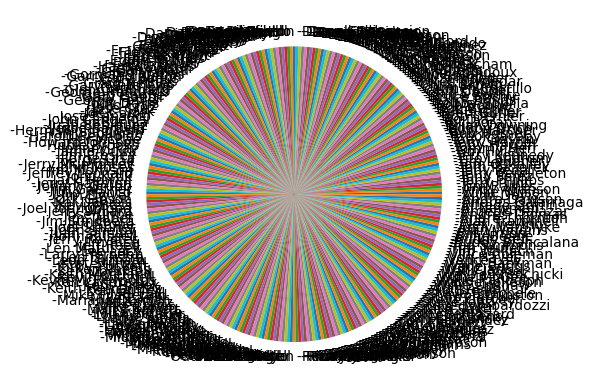

League


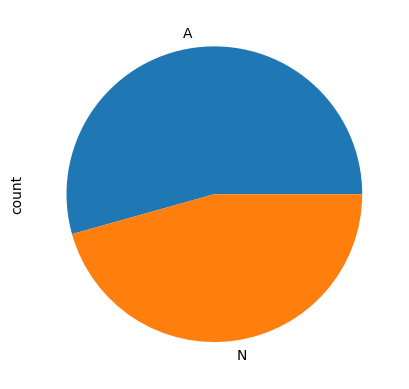

Division


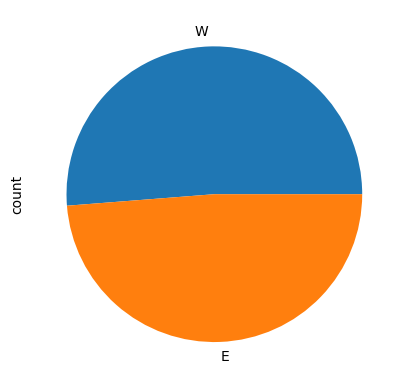

NewLeague


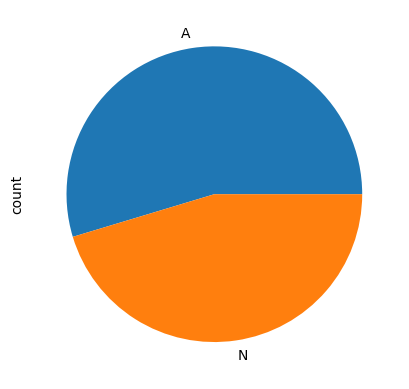

In [25]:
#checking the distribution of the categorical features
for i in cat_cols:
  print(i)
  df[i].value_counts().plot(kind='pie')
  plt.show()

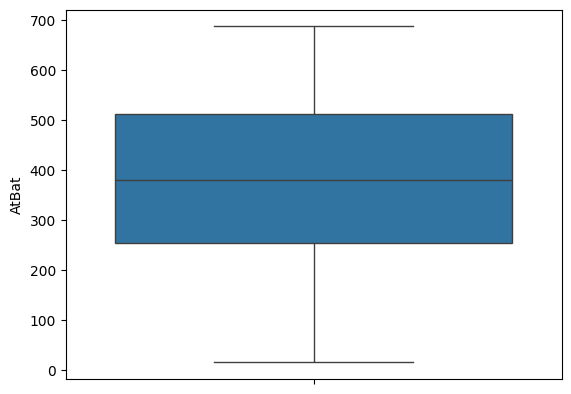

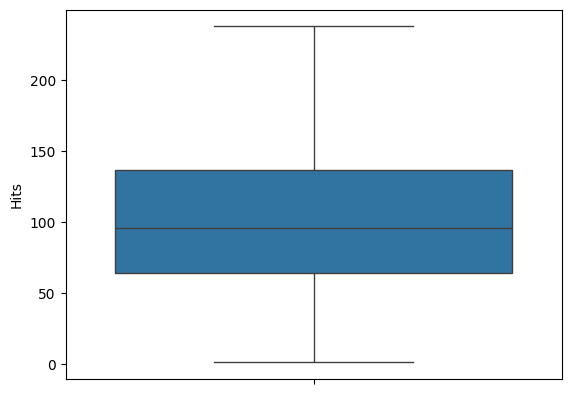

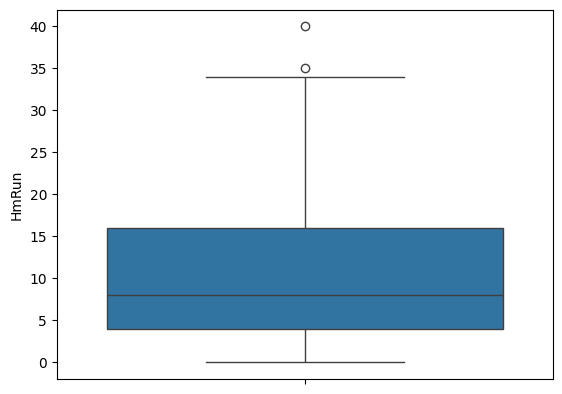

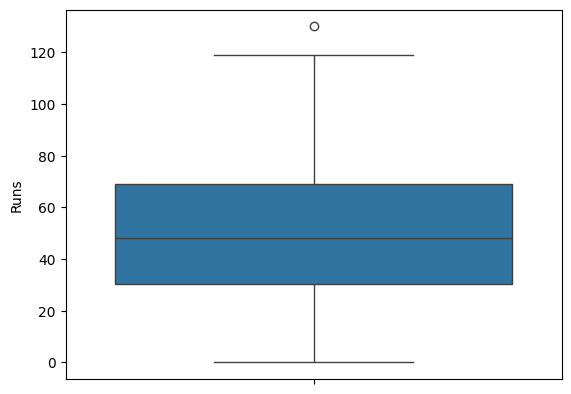

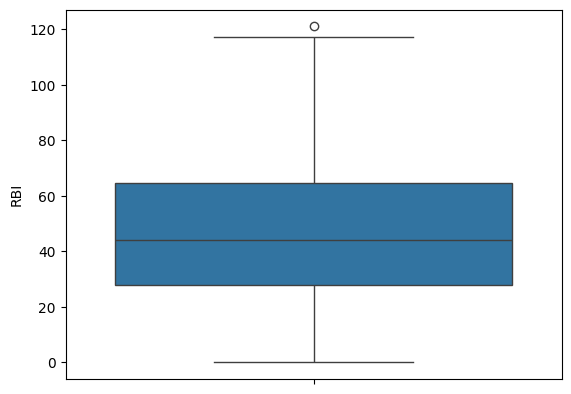

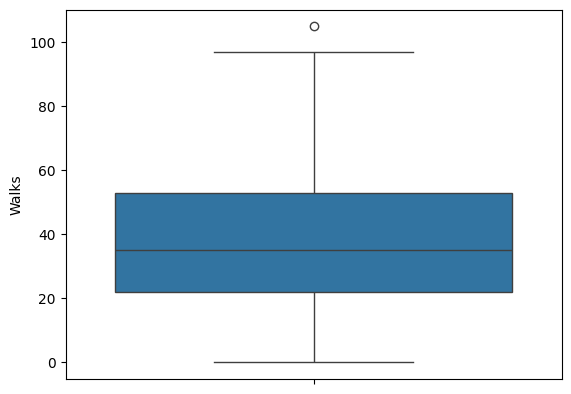

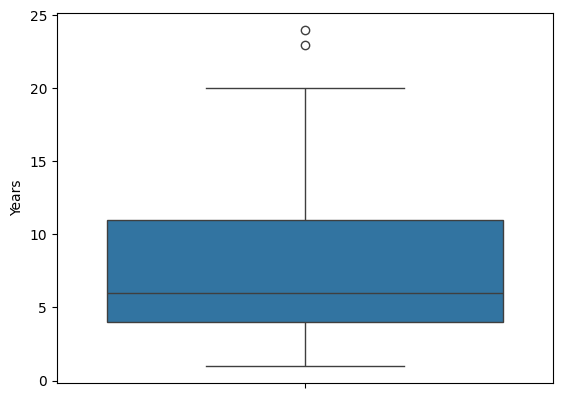

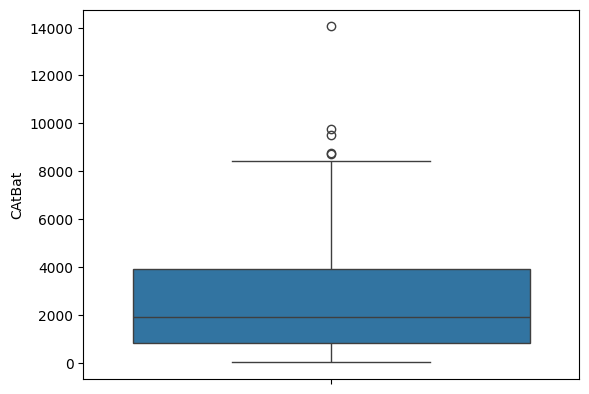

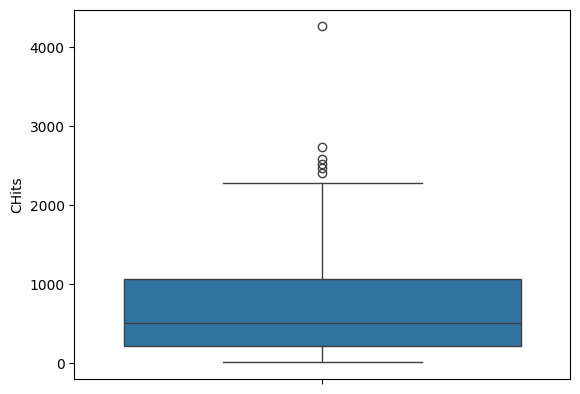

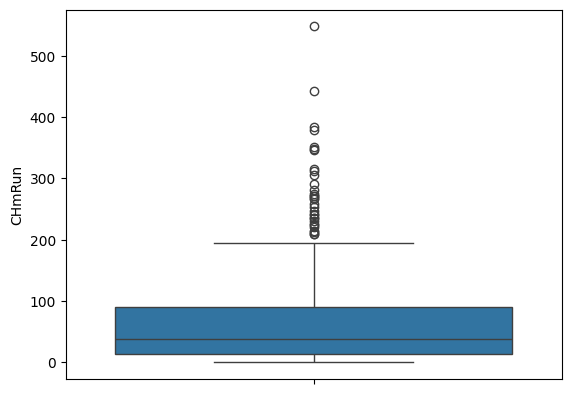

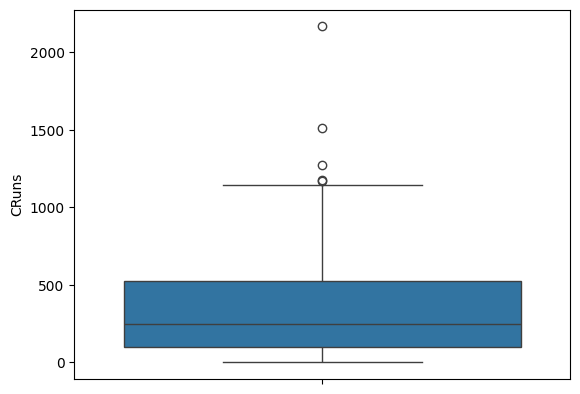

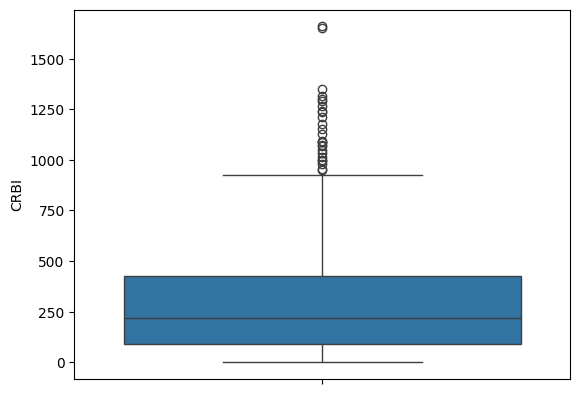

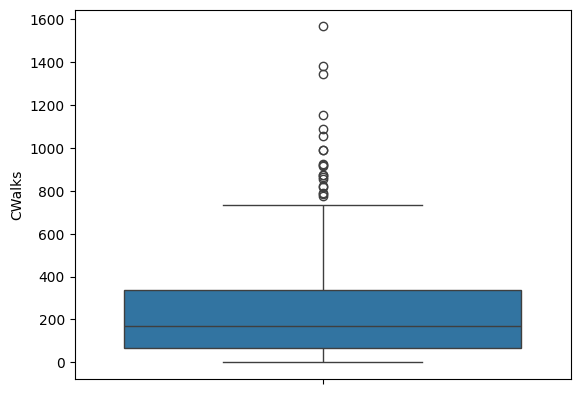

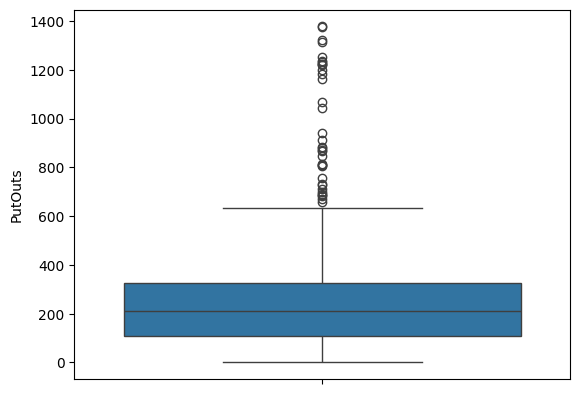

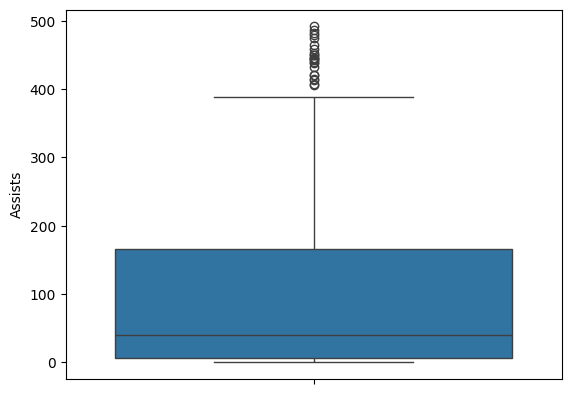

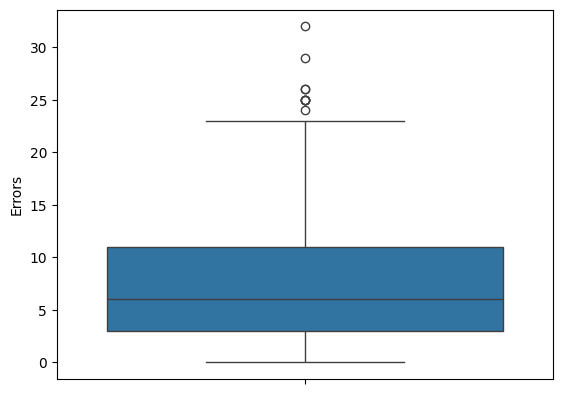

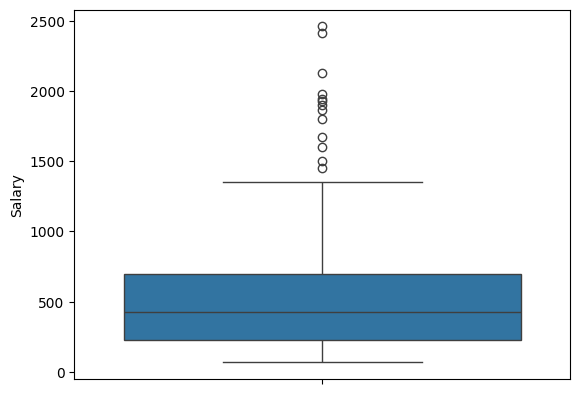

In [28]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

In [29]:
out_cols=['HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors']
def manage_outliers(df,col):
  for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lr=q1-1.5*iqr
    ur=q3+1.5*iqr
    df[i]=np.where(df[i]>ur,df[i].median(),df[i])
    df[i]=np.where(df[i]<lr,df[i].median(),df[i])
  return df
df=manage_outliers(df,out_cols)

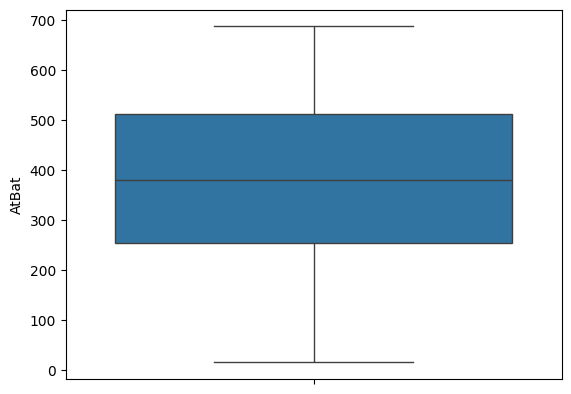

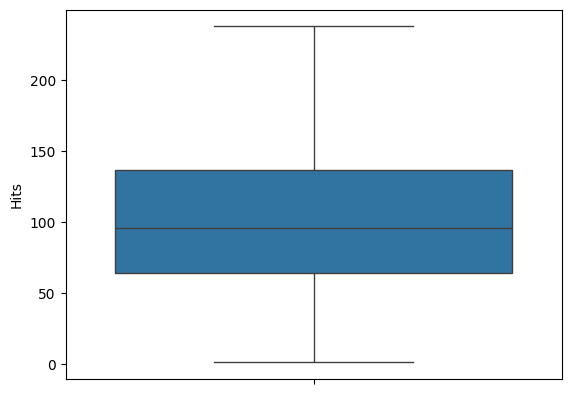

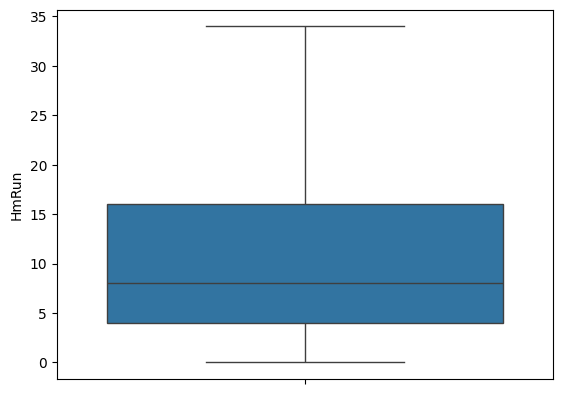

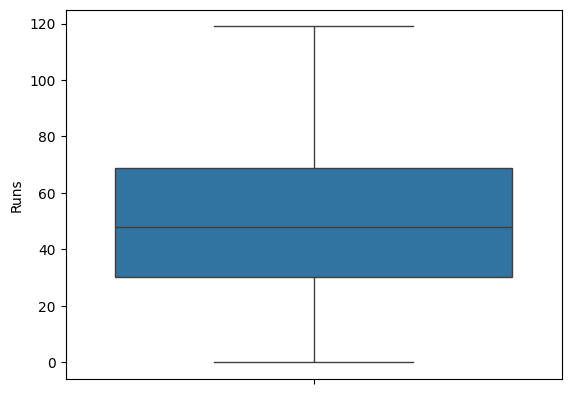

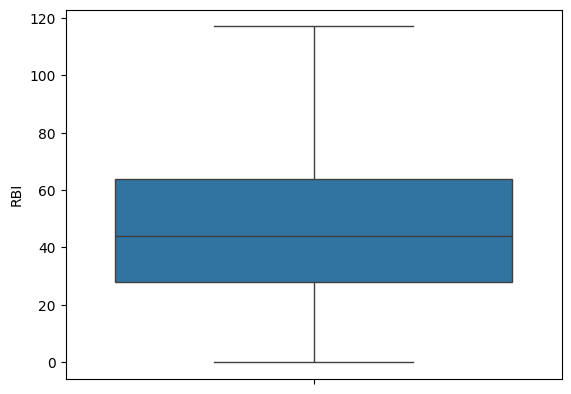

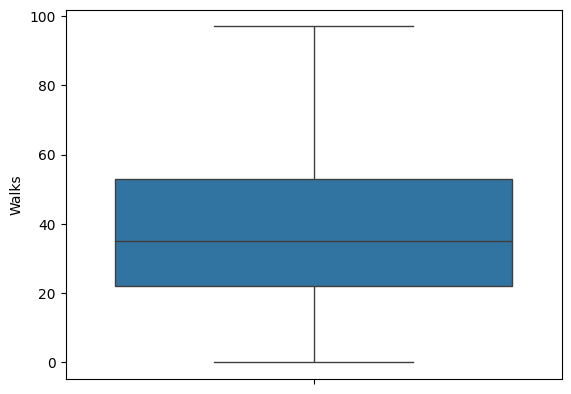

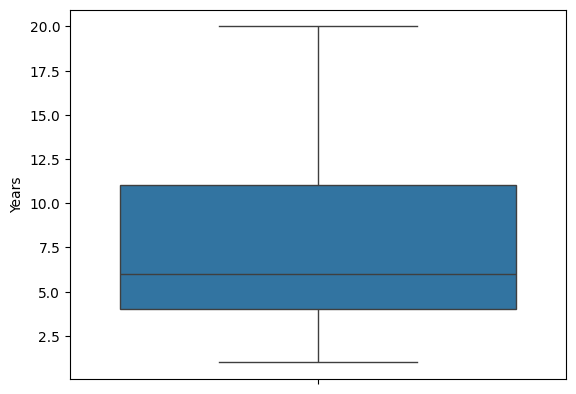

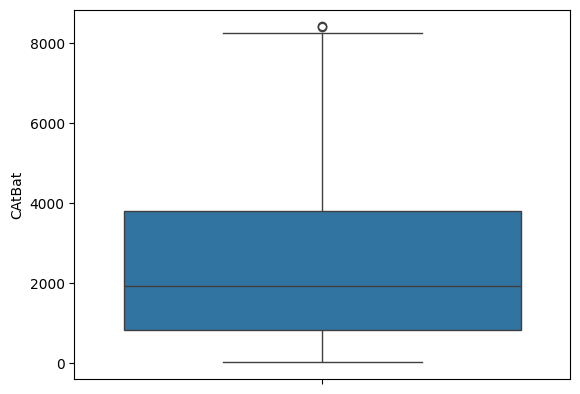

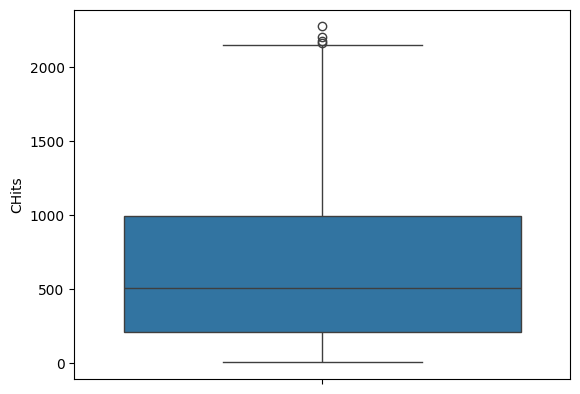

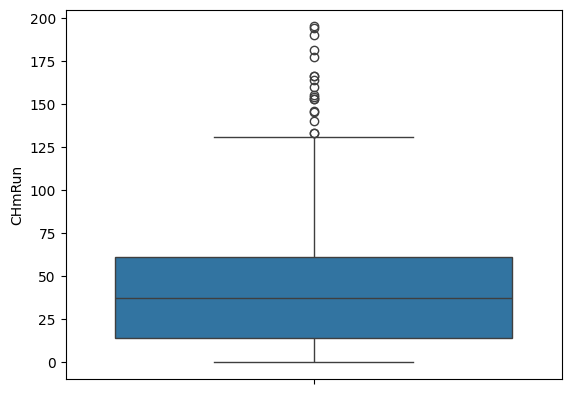

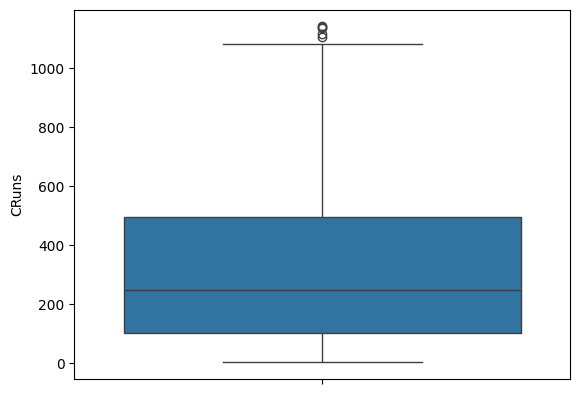

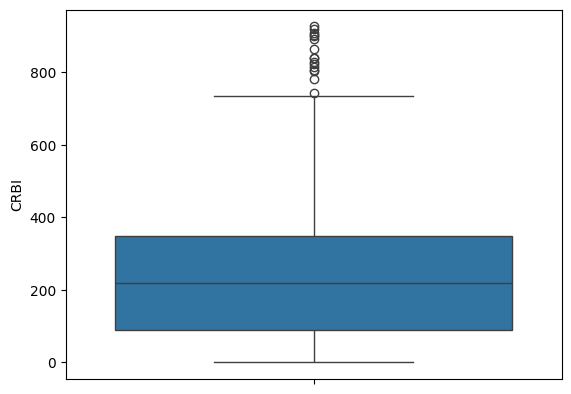

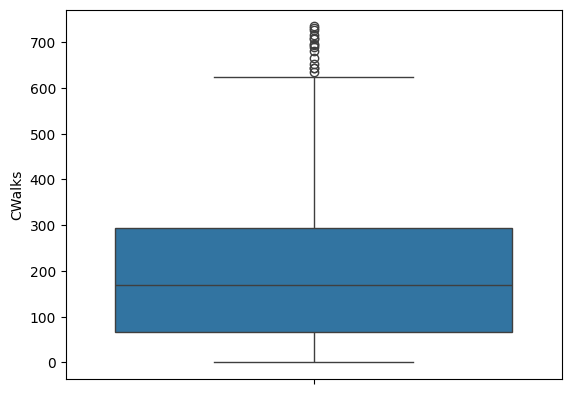

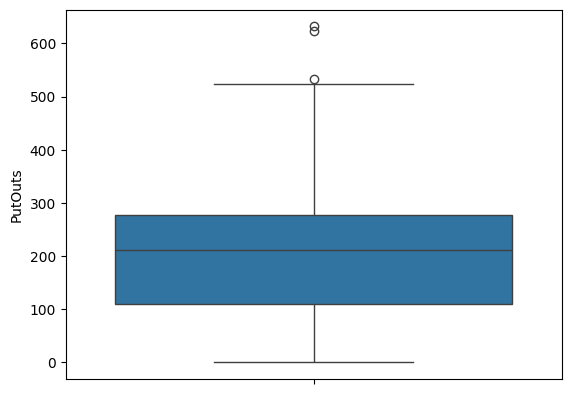

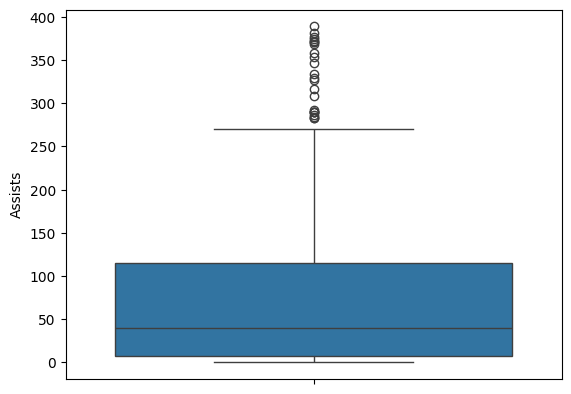

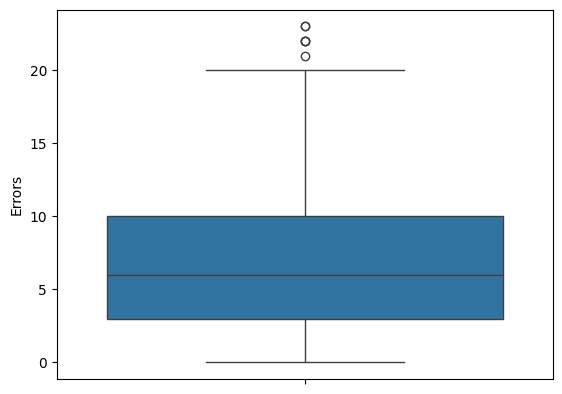

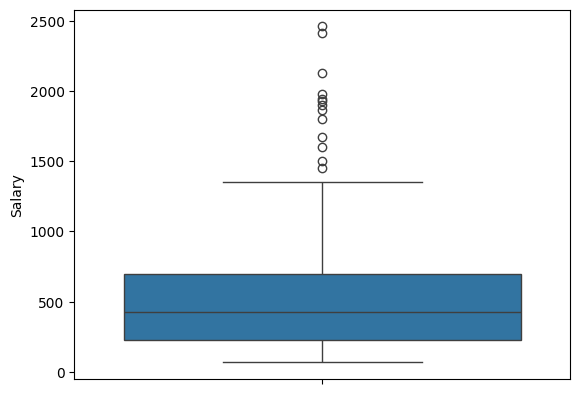

In [30]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

 as you can see that the outliers are managed but still there are some outliers in some columns which we will manage further

In [31]:
# now we will implement the skewness and  its transformations and the VIF method ,correlations,pairplots,scatterpltos, feature selection and then the categorical EDA